In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file = open("unbiased/su1")
rc = [-1.052,-0.932,-0.976,-1.028,-1.053,-0.915,1.081,1.023]
rc_traj = {}
for line in file:
    vals = line.split()[2:]
    temp = [float(i) for i in vals]
    time = int(float(line.split()[0]))
    rc_val = np.dot(rc, temp)
    rc_traj[time] = -1.0 * rc_val
file.close()

file = open("unbiased/su2")
for line in file:
    vals = line.split()[2:]
    temp = [float(i) for i in vals]
    time = int(float(line.split()[0]))
    rc_val = np.dot(rc, temp)
    rc_traj[time] = -1.0 * rc_val
file.close()

file = open("unbiased/su3")
for line in file:
    vals = line.split()[2:]
    temp = [float(i) for i in vals]
    time = int(float(line.split()[0]))
    rc_val = np.dot(rc, temp)
    rc_traj[time] = -1.0 * rc_val
file.close()

rcs = []
for i in range(500001):
    rcs.append(rc_traj[i])

500001


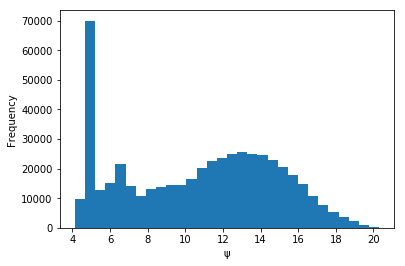

In [3]:
print(len(rcs))
plt.hist(rcs, bins=30)
plt.xlabel("\u03C8")
plt.ylabel("Frequency")
plt.show()

In [4]:
m1 = np.min(rcs)
m2 = np.max(rcs)
diff = (m2 - m1) / 30
cutoff = m1 + 3.0 * diff
print(cutoff)
bound = 0.0
unbound = 0.0
count = 0.0
diff = []
for i in range(500):
    for j in range(1000):
        if rcs[i*1000 + j] <= cutoff:
            bound = bound + 1.0
        else:
            unbound = unbound + 1.0
        count = count + 1.0
    bound_g = -2.5 * np.log(bound / count)
    unbound_g = -2.5 * np.log(unbound / count)
    diff.append(bound_g - unbound_g)
# plot in kJ

5.748455257700001


In [22]:
file = open("data/1su1")
rc = [-1.052,-0.932,-0.976,-1.028,-1.053,-0.915,1.081,1.023]
rc_traj1 = {}
for line in file:
    vals = line.split()[2:]
    temp = [float(i) for i in vals]
    time = int(float(line.split()[0]))
    rc_val = np.dot(rc, temp)
    rc_traj1[time] = -1.0 * rc_val
file.close()

file = open("data/1su2")
for line in file:
    vals = line.split()[2:]
    temp = [float(i) for i in vals]
    time = int(float(line.split()[0]))
    rc_val = np.dot(rc, temp)
    rc_traj1[time] = -1.0 * rc_val
file.close()

file = open("data/2su1")
rc = [-1.052,-0.932,-0.976,-1.028,-1.053,-0.915,1.081,1.023]
rc_traj2 = {}
for line in file:
    vals = line.split()[2:]
    temp = [float(i) for i in vals]
    time = int(float(line.split()[0]))
    rc_val = np.dot(rc, temp)
    rc_traj2[time] = -1.0 * rc_val
file.close()

file = open("data/2su2")
for line in file:
    vals = line.split()[2:]
    temp = [float(i) for i in vals]
    time = int(float(line.split()[0]))
    rc_val = np.dot(rc, temp)
    rc_traj2[time] = -1.0 * rc_val
file.close()

rcs_1 = []
for i in range(len(rc_traj1)):
    rcs_1.append(rc_traj1[i])
    
rcs_2 = []
for i in range(len(rc_traj2)):
    rcs_2.append(rc_traj2[i])

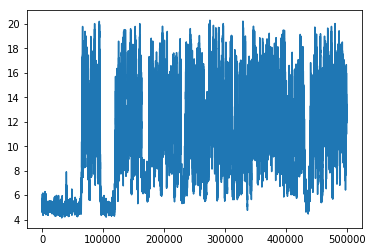

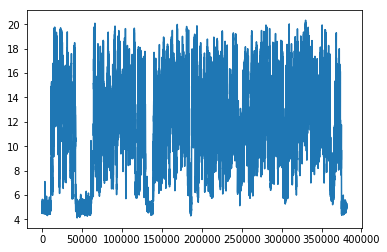

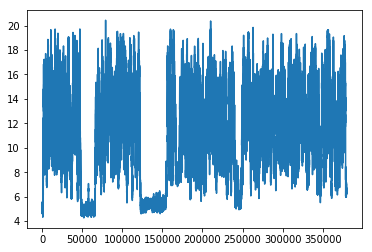

In [23]:
plt.plot(rcs)
plt.show()
plt.plot(rcs_1)
plt.show()
plt.plot(rcs_2)
plt.show()

In [24]:
m11 = np.min(rcs_1)
m21 = np.max(rcs_1)
diff1 = (m21 - m11) / 30
bound = 0.0
unbound = 0.0
count = 0.0
diff1 = []
tmp1 = len(rcs_1) % 1000
for i in range(tmp1):
    for j in range(1000):
        if rcs_1[i*1000 + j] <= cutoff:
            bound = bound + 1.0
        else:
            unbound = unbound + 1.0
        count = count + 1.0
    bound_g = -2.5 * np.log(bound / count)
    unbound_g = -2.5 * np.log(unbound / count)
    diff1.append(bound_g - unbound_g)

/home/amress/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


In [25]:
m12 = np.min(rcs_2)
m22 = np.max(rcs_2)
diff2 = (m22 - m12) / 30
bound = 0.0
unbound = 0.0
count = 0.0
diff2 = []
tmp2 = len(rcs_2) % 1000
for i in range(tmp2):
    for j in range(1000):
        if rcs_2[i*1000 + j] <= cutoff:
            bound = bound + 1.0
        else:
            unbound = unbound + 1.0
        count = count + 1.0
    bound_g = -2.5 * np.log(bound / count)
    unbound_g = -2.5 * np.log(unbound / count)
    diff2.append(bound_g - unbound_g)

IndexError: list index out of range

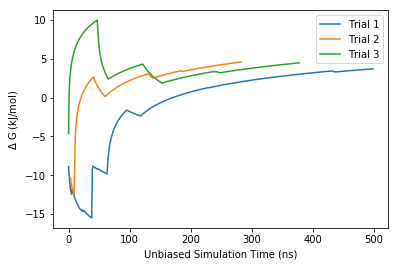

In [29]:
plt.plot(diff, label='Trial 1')
plt.plot(diff1, label='Trial 2')
plt.plot(diff2, label='Trial 3')
plt.legend()
plt.xlabel("Unbiased Simulation Time (ns)")
plt.ylabel("$\Delta$ G (kJ/mol)")
plt.show()

In [2]:
weight = np.load("data/weights.npy")

In [4]:
file = open("data/FULL_BIASED")
counter = 0
bound = 0.0
unbound = 0.0
sum_weights = 0.0
bias_rcs = []
for i in range(500):
    for j in range(500000):
        line = file.readline()
        rc = -1.0 * float(line.split()[1])
        bias_rcs.append(rc)
file.close()

In [3]:
file = open("data/FULL_BIASED")
counter = 0
bound = 0.0
unbound = 0.0
sum_weights = 0.0
bias_rcs = []
bias_diff = []
for i in range(500):
    for j in range(500000):
        line = file.readline()
        rc = -1.0 * float(line.split()[1])
        bias_rcs.append(rc)
        if rc <= cutoff:
            bound = bound + weight[counter]
            sum_weights = sum_weights + weight[counter]
        else:
            unbound = unbound + weight[counter]
            sum_weights = sum_weights + weight[counter]
        counter = counter + 1
    bound_g = -2.5 * np.log(bound / sum_weights)
    unbound_g = -2.5 * np.log(unbound / sum_weights)
    bias_diff.append(bound_g - unbound_g)
file.close()
plt.plot(diff, label="unbiased")
plt.plot(bias_diff, label="biased")
plt.xlabel("Simulation Time (ns)")
plt.ylabel("Gibbs Free Energy of Unbinding (kJ)")
plt.legend()
plt.show()

NameError: name 'cutoff' is not defined

In [ ]:
last_biased = bias_diff[len(bias_diff) - 1]
last_ubiased = diff[len(diff) - 1]
biased_low = []
biased_last = []
biased_high = []

ubiased_low = []
ubiased_last = []
ubiased_high = []

pan = []

for i in range(500):
    biased_low.append(last_biased-1.25)
    biased_last.append(last_biased)
    biased_high.append(last_biased+1.25)
    ubiased_low.append(last_ubiased-1.25)
    ubiased_last.append(last_ubiased)
    ubiased_high.append(last_ubiased+1.25)
    pan.append(8.41)

In [ ]:
plt.plot(diff, label='Unbiased')

#plt.plot(ubiased_low, "--", color="purple", alpha=0.4)
plt.plot(ubiased_last, "purple", alpha=0.8)
x=[i for i in range(500)]
plt.fill_between(x, ubiased_low, ubiased_high, alpha=0.2)
#plt.plot(ubiased_high, "--", color="purple", alpha=0.4)

plt.plot(bias_diff, label='Biased')

#plt.plot(biased_low, "r--", alpha=0.4)
plt.plot(biased_last, "red", alpha=0.8)
plt.fill_between(x, biased_low, biased_high, alpha=0.2)
#plt.plot(biased_high, "r--", alpha=0.4)

plt.plot(pan, color="black", label="Reference Value (Pan)")

plt.xlabel("Simulation Time (ns)")
plt.ylabel("$\Delta$ G (kJ/mol)")
plt.rc('font', size=18)          # controls default text sizes
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.rc('legend', fontsize=12)    # legend fontsize
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)    # fontsize of the tick labels
plt.legend(loc=4)
plt.show()

In [ ]:
small_rcs = []
xs = []
counter = 0
for i in range(len(rcs)):
    if i % 10 == 0:
        xs.append(counter / 100.0)
        small_rcs.append(rcs[i] / 1.081)
        counter = counter + 1

plt.plot(xs, small_rcs)
plt.xlabel("Unbiased Simulation Time (ns)")
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.ylabel("\u03C8")
plt.show()

In [5]:
print(len(bias_rcs))

250000000


In [6]:
plz_god = []
for i in range(len(bias_rcs)):
    if i % 1000 == 0:
        plz_god.append(bias_rcs[i])

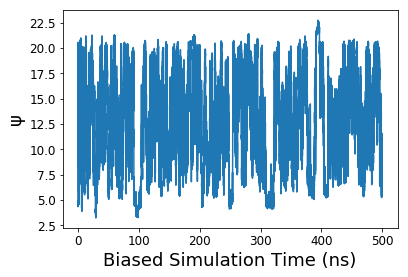

In [9]:
counter = 0
new_xs = []
for i in range(len(plz_god)):
    new_xs.append(counter / 500.0)
    counter = counter + 1

plt.plot(new_xs, plz_god)
plt.xlabel("Biased Simulation Time (ns)")
plt.rc('font', size=18)          # controls default text sizes
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.rc('legend', fontsize=12)    # legend fontsize
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)    # fontsize of the tick labels
plt.ylabel("\u03C8")
plt.show()